## Jakub Suślik
Prosty percepton służący do rozpoznawania binarnego pomiędzy 4 i 7 z wykorzytaniem zbioru MNIST.

In [ ]:
class Perceptron:

    def __init__(self, n):
        self.w = np.random.rand(n + 1)

    def predict(self, x):
        x_with_bias = np.insert(x, 0, 1)
        u = np.dot(self.w, x_with_bias)
        return 1 if u >= 0 else 0

    def train(self, xx, d, eta, tol,max_epoch):
        errors = tol + 1
        epoch = 0
        while errors > tol:
            error = 0
            for inputs, label in zip(xx, d):
                prediction = self.predict(inputs)
                self.w += eta * (label - prediction) * np.insert(inputs, 0, 1)
                error += int(label != prediction)

            errors = error/len(xx)
            epoch +=1
            if epoch==max_epoch:
              break

        return self.w ,epoch

    def evaluate_test(self, xx, d):
        errors = 0
        predictions = []
        for inputs, label in zip(xx, d):
            prediction = self.predict(inputs)
            predictions.append(prediction)
            errors += int(label != prediction)
        return errors, predictions

    def evaluate_sample(self,sample):
        sol=self.predict(sample)
        return sol

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

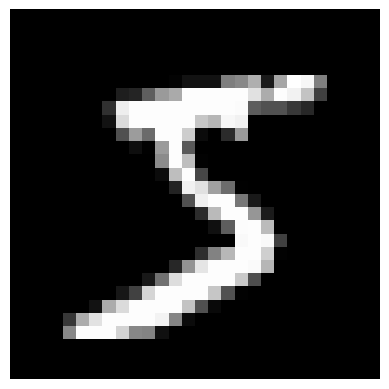

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
# train_X.shape,train_y.shape
train_X[0]
image=train_X[0]
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
def select(X,y,n,m):
  i = np.where((y==n) | (y==m))
  selected_X = X[i]
  selected_y = y[i]
  return selected_X, selected_y

In [ ]:
trainx,trainy=select(train_X,train_y,7,4)

In [ ]:
testx,testy=select(test_X,test_y,7,4)

In [ ]:
trainy[trainy==7]=0
trainy[trainy==4]=1
testy[testy==7]=0
testy[testy==4]=1

In [ ]:
def change_input(x,norm=False):
  a,b,c = np.shape(x)
  new_m = np.empty((len(x),b*c))
  for i in range(a):
    new_m[i]=np.reshape(x[i],(1,b*c))

  if norm==True:
    for i in range(len(new_m)):
      max=np.max(new_m[i])
      new_m[i]=new_m[i]/max

  return new_m



In [ ]:
trainx1=trainx

In [ ]:
trainx2=change_input(trainx1)

In [ ]:
testx1=testx

In [ ]:
testx2=change_input(testx1)

In [ ]:
perceptron_mnist=Perceptron(len(trainx2[0]))

In [ ]:
perceptron_mnist.train(trainx2,trainy,0.2,0.01,100)
errors, predictions = perceptron_mnist.evaluate_test(testx2, testy)
accuracy = (len(testy) - errors) / len(testy)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 98.71%


In [ ]:
import cv2

In [ ]:
def img_convert(img):
  img = cv2.imread(img,cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (28,28), interpolation=cv2.INTER_LINEAR)
  img = cv2.bitwise_not(img)
  return img

In [ ]:
!git clone https://github.com/JakubSus25/moje_cyfry.git

Cloning into 'moje_cyfry'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 17 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (17/17), 171.53 KiB | 5.53 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
img1 = r'moje_cyfry/0001.jpg'
img2 = r'moje_cyfry/0002.jpg'
img3 = r'moje_cyfry/0003.jpg'
img4 = r'moje_cyfry/0004.jpg'
img5 = r'moje_cyfry/0005.jpg'
img6 = r'moje_cyfry/0006.jpg'



In [ ]:
l4=[img1,img2,img3,img4,img5,img6]

In [ ]:
a4=[]
for i in l4:
  a4.append(img_convert(i))

In [ ]:
b4=change_input(a4)

In [ ]:
results4 = []
for i in b4:
  results4.append(perceptron_mnist.evaluate_sample(i))

In [ ]:
results4

[1, 1, 1, 1, 1, 1]

In [ ]:
img11 = r'moje_cyfry/0011.jpg'
img12 = r'moje_cyfry/0012.jpg'
img13 = r'moje_cyfry/0013.jpg'
img14 = r'moje_cyfry/0014.jpg'
img15 = r'moje_cyfry/0015.jpg'
img16 = r'moje_cyfry/0016.jpg'


In [ ]:
l7=[img11,img12,img13,img14,img15,img16]

In [ ]:
a7= []
for i in l7:
  a7.append(img_convert(i))

In [ ]:
b7=change_input(a7)

In [ ]:
results7 = []
for i in b7:
  results7.append(perceptron_mnist.evaluate_sample(i))

In [ ]:
results7

[1, 0, 0, 0, 0, 0]

Jak widać po wynikach prosty preceptron i tak całkiem nieźle radzi sobie z klasyfikacją 4 i 7. Na zbiorze testowym MNIST osiągnięto 98.41 poprawności.

$[1, 1, 1, 1, 1, 1]$ - wynik dla zdjec 4 - czyli ok wsyzstko

$[1, 0, 0, 0, 0, 0]$ - wynik dla zdjec 7 - jedna pomyłka




In [ ]:
perceptron_mnist2=Perceptron(len(trainx2[0]))

In [ ]:
trainxnorm=change_input(trainx1,True)
testxnorm=change_input(testx1,True)

In [ ]:
perceptron_mnist2.train(trainxnorm,trainy,0.2,0.01,100)
errors, predictions = perceptron_mnist2.evaluate_test(testxnorm, testy)
accuracy = (len(testy) - errors) / len(testy)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.11%


In [ ]:
bn4=change_input(a4,True)
bn7=change_input(a7,True)

In [ ]:
results_n4=[]
for i in bn4:
  results_n4.append(perceptron_mnist2.evaluate_sample(i))

results_n4

[1, 1, 1, 1, 1, 1]

In [ ]:
results_n7=[]
for i in bn7:
  results_n7.append(perceptron_mnist2.evaluate_sample(i))

results_n7

[1, 0, 0, 0, 0, 1]